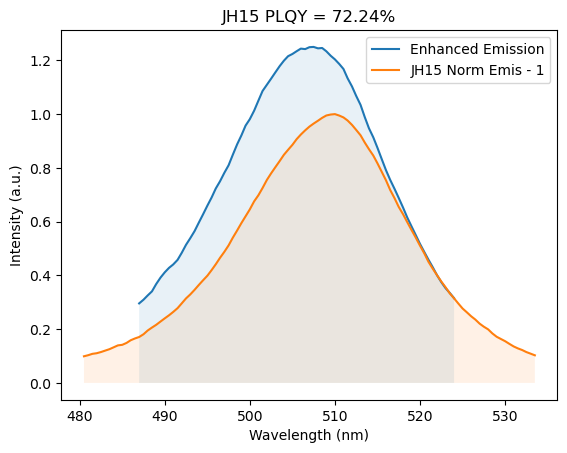

In [18]:
from scipy.interpolate import pchip_interpolate
import matplotlib.pyplot as plt
import helper.plotHelper as ph
import helper.qyHelper as qh
from scipy import integrate
import pandas as pd
import numpy as np

'''
# JH15 in Hexane
bp = '/Users/josuehernandez/Downloads/drive-download-20230629T004335Z-001/Blank_JH15_50_400_CENTRIFUGE_0TO1A.txt'
tp = '/Users/josuehernandez/Downloads/drive-download-20230629T004335Z-001/JH15_50_400_CENTRIFUGE_DILUTE_100_350_0TO2A.txt'
op = '
/Users/josuehernandez/Downloads/drive-download-20230629T004335Z-001/JH15_50_400_CENTRIFUGE_0TO2A.txt
'

# JH15 in E1
bp = '/Users/josuehernandez/Downloads/drive-download-20230629T004335Z-001/Blank_JH15_E1_50_400_CENTRIFUGE_0TO2A.txt'
tp = '/Users/josuehernandez/Downloads/drive-download-20230629T004335Z-001/JH15_50_400_E1_CENTRIFUGE_DILUTE_100_350_0TO2A.txt'
op = '
/Users/josuehernandez/Downloads/drive-download-20230629T004335Z-001/JH15_50_400_E1_CENTRIFUGE_0TO2A.txt
'

# E1 QY
bp = '/Users/josuehernandez/Downloads/drive-download-20230629T004335Z-001/Blank_SLS_E1_STOCK_0TO2A.txt'
tp = '/Users/josuehernandez/Downloads/drive-download-20230629T004335Z-001/NMV_SLS_E1_STOCK_0TO1A.txt'
op = '
/Users/josuehernandez/Downloads/drive-download-20230629T004335Z-001/NMV_SLS_E1_STOCK_0TO1A.txt
'

# A5 Stock
bp = '/Users/josuehernandez/Downloads/drive-download-20230629T004335Z-001/BLANK_A5_STOCK_0TO1A.txt'
tp = '/Users/josuehernandez/Downloads/drive-download-20230629T004335Z-001/A5_STOCK_0TO1A.txt'
op = '
/Users/josuehernandez/Downloads/drive-download-20230629T004335Z-001/A5_STOCK_0TO1A.txt
'

# A5 Day 2
bp = '/Users/josuehernandez/Downloads/drive-download-20230629T004335Z-001/Blank_for_A5_Day2_Stock_and_Centrifuge_0TO1A.txt'
tp = '/Users/josuehernandez/Downloads/drive-download-20230629T004335Z-001/A5_Day2_Precipitate_Dilute_400_100_0TO1A.txt'
op = '
/Users/josuehernandez/Downloads/drive-download-20230629T004335Z-001/A5_Day2_Precipitate_Dilute_400_100_0TO1A.txt
'

# A5 Day 2 Super
bp = '/Users/josuehernandez/Downloads/drive-download-20230629T004335Z-001/Blank_for_A5_Day2_Stock_and_Centrifuge_0TO1A.txt'
tp = '/Users/josuehernandez/Downloads/drive-download-20230629T004335Z-001/A5_Day2_Supernatant_0TO1A.txt'
op = '
/Users/josuehernandez/Downloads/drive-download-20230629T004335Z-001/A5_Day2_Supernatant_0TO1A.txt
'

'''

sample = 'JH15'
sample_Detail = sample + ' in Hexane'
############################## Files: Corretion, Blank, True (Diluted), Observed (Undiluted) ##############################
cp = '/Users/josuehernandez/jh_sheldon_group/data/PLQY/Correction.txt'
bp = '/Users/josuehernandez/Downloads/drive-download-20230629T004335Z-001/Blank_JH15_50_400_CENTRIFUGE_0TO1A.txt'
tp = '/Users/josuehernandez/Downloads/drive-download-20230629T004335Z-001/JH15_50_400_CENTRIFUGE_DILUTE_100_350_0TO2A.txt'
op = '''
/Users/josuehernandez/Downloads/drive-download-20230629T004335Z-001/JH15_50_400_CENTRIFUGE_0TO2A.txt
'''
alphabet = ph.alphabet
numbers = ph.numbers
############################## Importing ##############################
cor = pd.read_csv(cp, delimiter='\t', names=('wavelength', 'voltage')) # Correction
blk_x, blk_y = ph.ssdat2txt(bp) # Blank
tru_x, tru_y = ph.ssdat2txt(tp) # True (Diluted)
obs_x, obs_y = ph.ssdat2txt(op) # Observed (Undiluted)

############################## Extraction ##############################

            ######### Correction data #########
cx = cor.wavelength
cy = cor.voltage
cl = pchip_interpolate(cx,cy,blk_x[0]) # interpolates the correction data to have as many data points as the raw data (# of x data points in the blank)

            ######### Blank data #########
blk_x = blk_x[0] # Selecting the first row in the Blank and True data, Optionally, can reshape by bx.reshape(301,)
blk_y = blk_y[0]
blk_y = blk_y * cl * (blk_x * 10 ** -9) # Normalized Blank data

            ######### True data #########
tru_x = tru_x[0]
tru_y = tru_y[0]
tru_y =  tru_y * cl * (tru_x * 10 ** -9) # Normalized True (Scatter) data
ph.nthPeakPlotter(tru_x,tru_y,nth=2,plot=False,scale=1,threshold=0.001,fill=True,label='True Normalized')

# u = np.arange(len(op.split()))
u = [0]
f = 1.25 # Alpha factor to scale the True (Scatter) peak to fit the long wavelength region in the concentrated sample ( Oberserved (Undiluted) )
threshold = 0.1
dilute = False
plotNonScaled = dilute
plotScaled = not plotNonScaled
for i in u:
    id = numbers[i]
    obs_x_i = obs_x[i] # Selecting the ith row of the Observed (Undiluted) Data
    obs_y_i = obs_y[i]

    # Calculates the Blank excitation integral
    Blk = ph.nthPeakPlotter(blk_x, blk_y,nth=1,integral=True,plot=plotNonScaled,
                            fill=True, threshold=0.1,
                            label='Blank Norm') # Get Blank Integral

    # Enhanced spectrum plot and integral value
    En_t = ph.nthPeakPlotter(tru_x,tru_y,nth=2,integral=True, plot=plotScaled,
                            scale=f,threshold=threshold, fill=True,
                            label='Enhanced Emission')

    cor_interp_up = pchip_interpolate(cx,cy,obs_x_i) # Corretion Interpolate Upper

    oya = obs_y_i * cor_interp_up * (obs_x_i * 10 ** -9)   # Observed (Undiluted) Data Adjusted
    # Observed x and y, normalized  
    Obs_1 = ph.nthPeakPlotter(obs_x_i, oya, 1, integral=True, plot=plotNonScaled, 
                                    fill=True, scale=None, threshold=threshold,
                                    label='Excitation ' + sample + ' - ' + str(id))
    Obs_2 = ph.nthPeakPlotter(obs_x_i, oya, 2, integral=True, plot=plotNonScaled, 
                                    fill=True, scale=None, threshold=threshold, 
                                    label='Emission ' + sample + ' - ' + str(id))
    Obs_2N = ph.nthPeakPlotter(obs_x_i, oya, 2, integral=True, plot=plotScaled, 
                                    fill=True, scale=1, threshold=threshold,
                                    label= sample + ' Norm Emis' + ' - ' + str(id))

    Qy = qh.qyCalc(Obs_2N[2], En_t[2], Obs_2[2], Blk[2], Obs_1[2], dilute)
    plt.title(sample + ' PLQY = ' + Qy), plt.xlabel('Wavelength (nm)'), plt.ylabel('Intensity (a.u.)') 
    plt.legend()
    plt.show()


In [ ]:
# JH15 Hex, 63.21%
# JH15 E1, 63.66%
# E1 3.23%
# A5 Stock 43.44%
# A5 Day 2 18.24%
# A5 Day 2 Supernatant 36.48%
